Social media sentiment analysis is the process of determining the emotional tone or attitude behind a piece of text, such as a tweet, Facebook post, or review, on social media platforms. It involves analyzing the text to determine whether the sentiment expressed is positive, negative, or neutral.

Natural Language Processing (NLP): NLP is a subfield of artificial intelligence that deals with the interaction between computers and humans in natural language.

Machine Learning: Machine learning algorithms can be trained on large datasets to learn patterns and relationships between words and sentiment.

Here we are using Twitter data for Sentiment Analysis.

Importing required libraries

In [4]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

%matplotlib inline

Reading the file (data)

In [5]:
data = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/codtech internship/tesla tweets data.csv")

Creating Dataframe

In [6]:
df=pd.DataFrame(data)

In [7]:
df.shape

(2000, 3)

In [8]:
df.info

<bound method DataFrame.info of                     Date & Time  label   
0     April 10, 2022 at 07:44PM      0  \
1     April 10, 2022 at 07:45PM      0   
2     April 10, 2022 at 07:45PM      0   
3     April 10, 2022 at 07:45PM      0   
4     April 10, 2022 at 07:45PM      0   
...                         ...    ...   
1995  April 12, 2022 at 11:12PM      0   
1996  April 12, 2022 at 11:12PM      0   
1997  April 12, 2022 at 11:13PM      1   
1998  April 12, 2022 at 11:13PM      0   
1999  April 12, 2022 at 11:13PM      0   

                                             Tweet Text  
0     RT @invest_answers: Crypto news, #Bitcoin Whal...  
1     #Tesla tiene récord de autos vendidos. Es impr...  
2     RT @CottonCodes: 🐒 #love in my #MariaCallas I ...  
3     RT @CottonCodes: 🐒 #love in my #MariaCallas I ...  
4     RT @RupiReportero_: 🙆‍♂️🚘 Al que le robaron la...  
...                                                 ...  
1995  RT @dogecolombia: #Tesla #Dogecoin 😎🚀 https://...  

Preprocess Text Data

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return '.join(tokens)'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Installing required package 

In [10]:
!pip install vaderSentiment

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Extracting Sentiment Scores 

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def extract_sentiment(text):
    scores = sia.polarity_scores(text)
    return scores['compound']

df['sentiment'] = df['Tweet Text'].apply(lambda x: extract_sentiment(x))

print(df.head())

                 Date & Time  label   
0  April 10, 2022 at 07:44PM      0  \
1  April 10, 2022 at 07:45PM      0   
2  April 10, 2022 at 07:45PM      0   
3  April 10, 2022 at 07:45PM      0   
4  April 10, 2022 at 07:45PM      0   

                                          Tweet Text  sentiment  
0  RT @invest_answers: Crypto news, #Bitcoin Whal...     0.4939  
1  #Tesla tiene récord de autos vendidos. Es impr...    -0.2960  
2  RT @CottonCodes: 🐒 #love in my #MariaCallas I ...     0.8091  
3  RT @CottonCodes: 🐒 #love in my #MariaCallas I ...     0.8091  
4  RT @RupiReportero_: 🙆‍♂️🚘 Al que le robaron la...     0.0000  


Visualizing Sentiment Trends over Time

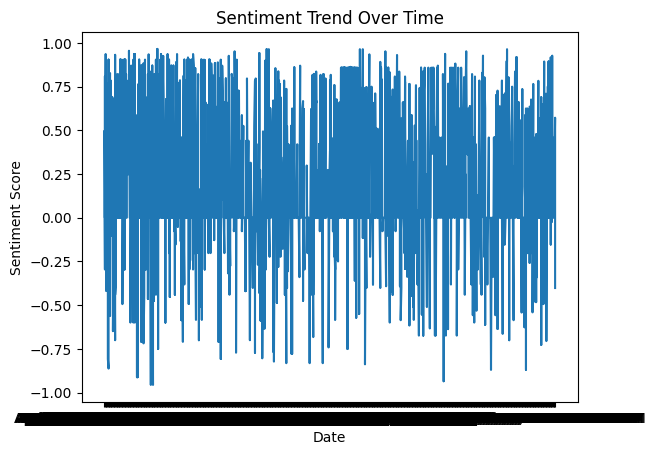

In [12]:
plt.plot(df['Date & Time'], df['sentiment'])
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trend Over Time')
plt.show()

Summary

So this is how you can perform the task of Twitter sentiment analysis by using the Python programming language. Analyzing sentiments is a task of natural language processing. All the social media platforms need to keep a check on the sentiments of people engaged in a discussion.
